<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_06_ClasificacionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificacion Logística

Si deseamos clasificar algún tipo de imagen, resultado en campos medicos, astrofisicos se pueden aplicar algoritmos de clasificación. En particular en esta sesión se estudia los principios basicos de  regresión logística para aplicarla a los  modelos de clasificación.

Supongamos que queremos clasificar dos tipos basado en dos características:



In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_circles
import numpy as np

Text(0, 0.5, 'X_2')

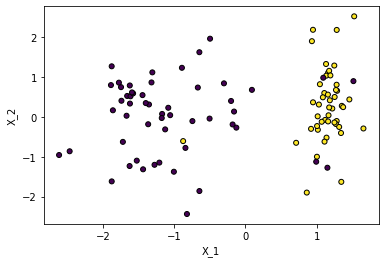

In [ ]:
X1, Y1 = make_classification(
    n_features = 2, n_redundant = 0, n_informative=1, n_clusters_per_class=1,
    random_state = 1, class_sep=1.2, flip_y = 0.15)
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
plt.xlabel("X_1")
plt.ylabel("X_2")

En este caso cada color representa los objetos tipos 0 y tipo 1. Para aplicar un algoritmo de clasificación relacionaremos el valor $h_{\theta}(X^{i})$ con la probabilidad de obtener un valor de y dado un x parametrizado por $\theta$, $P(y|x;\theta)$, asi :

 $h_{\theta}(X^{i}) = P(y|x;\theta) $

 Se cumple que:  $P(y=1|x;\theta)+P(y=0|x;\theta) = 1$

Si tenemos muestra equiprobables, podemos definir lo siguiente  para P :

- $P<0.5$ se obtienen los objetos tipo 0
- $P \geq 0.5$ se obtienen los objetos tipo 1

Podemos establecer un clasificador de lods  sistemas basado en las probabilidades a partir de un clasificador logístico:


\begin{equation}
f(z)=\frac{1}{(1+e^{-z})}
\end{equation}
Cuya derivada es :

\begin{equation}
f'(z)=f(z)(1-f(z))
\end{equation}



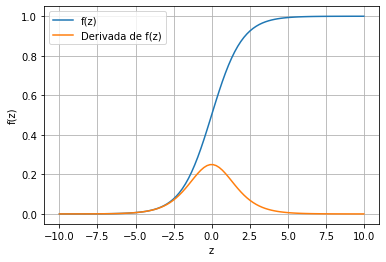

In [ ]:
f = lambda x: 1/(1+np.exp(-x))
fp = lambda x: f(x)*(1-f(x))
z=np.linspace(-10, 10, 100)

plt.figure()
plt.plot(z,f(z), label="f(z)")
plt.plot(z,fp(z), label="Derivada de f(z)")
plt.ylabel("f(z)")
plt.xlabel("z")
plt.grid()
plt.legend()

- Para valores de $z< 0.0$ la regresión logistica clasica objetos tipo 0, siendo $f(z)<0.5$
- Para valores de $z\geq 0.0$ la regresión logística clasica objetos tipo 1 siendo $f(z) \geq  0.5$

¿Cual es la probabilidad de que dado un hyperplano, los valores de un hyperlado sean objetos tipo 0 o tipo 1?

Aplicando la regresión logistica, a las regresiones multivariadas estudiadas en la sesiones anteriores, tenemos que el argumento $z=\Theta^{T} X$, así:


\begin{equation}
h_{\theta}(X)=\frac{1}{(1+e^{-\Theta^T X})}
\end{equation}


- Se cumple que para los valores del hyperplano  $\Theta^T X\geq 0.0$, $y = 1$
- Se cumple que para  $\Theta^T X < 0.0$ , $y = 0$


Las condiciones anteriores permiten definir fronteras de desicion entre los datos a clasificar. Para los datos dados arriba, se puede establecer el siguiente clasificador.


$h_\theta(x) = g(\theta_0+\theta_1 x_1+\theta_2 x_2 ) $.

Una clasificación del dataset nos sugiere que la frontera para este dataset es:

$\theta_0+\theta_1 x_1+\theta_2 x_2 \geq 0.0$

Si por algun metodo encontramos que los parametros $\Theta$ entonces podemos definir la frontera de clasifiación. Como ejemplo supongamos que encontramos los siguientes parametros $\Theta=[3.0, -20, 1.0]$

Ecnontrar la ecuacion de la recta y mejorar la parametrizacion

$3-20x1+x2=0$

$x_2= 20 x_1 - 3$

In [ ]:
x1 = np.linspace(0, 0.29, 100)
x2 = 20*x1-3

Text(0, 0.5, 'X_2')

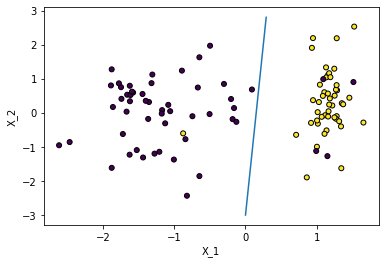

In [ ]:
X1, Y1 = make_classification(
    n_features = 2, n_redundant = 0, n_informative=1, n_clusters_per_class=1,
    random_state = 1, class_sep=1.2, flip_y = 0.15)
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
plt.plot(x1, x2)
plt.xlabel("X_1")
plt.ylabel("X_2")

Fronteras no lineal también puede ser consideradas, para ello se puede definir  $\Theta^T X$ como funcion de un polinomio, por ejemplo

$\Theta^T X =  \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4$

\begin{equation}
h_\theta(X) =  \frac{1}{1+e^{\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4}}
\end{equation}

La frontera de desición en este caso esta determinada por:

$\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4 \geq 0$
para obtener un clasificador con valores de y = 1.

Para este mismo caso, supongamos que tenmos la siguiente distribución de datos, ¿Cuál es el mejor elección de parámetros $\Theta$ que permite clasificar los datos siguientes:







(-1.12244940477901, 1.1839643638442499, -1.2696420440360447, 1.185918477713659)

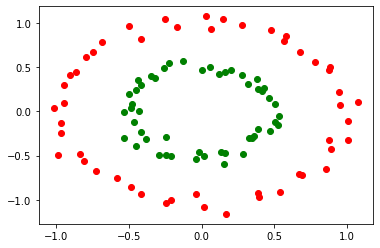

In [ ]:
X, y = make_circles(
    n_samples=100, factor=0.5, noise=0.05, random_state=0)
red = y == 0
green = y == 1
f, ax = plt.subplots()
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
plt.axis("tight")

Analizando el conjunto de datos, se puede observar que la frontera es la de una circunferencia con centro en (0, 0) y radio de 0.7 aproxidamente,  asi nuestra elección de parámetros para el polinomio ejemplicado en la celda anterior ($\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4 \geq 0$ ) es:


$\Theta^T = [0.7,0, 0, 1,1 ] $

Reemplando tenemos que:

$-0.7+x_1^2+x_2^2 \geq 0$

$x_1^2+x_2^2 \geq 0.7$

Text(0, 0.5, 'X_2')

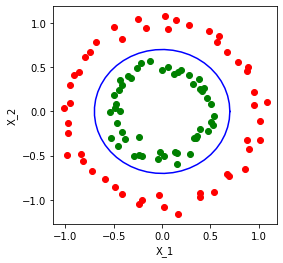

In [ ]:
#Por motivos graficos transformemos la ecuación anterior parametrizada
#por theta

alpha = np.linspace(0, 2*np.pi)
x1=0.7*np.cos(alpha)
x2=0.7*np.sin(alpha)

X, y = make_circles(
    n_samples=100, factor=0.5, noise=0.05, random_state=0)
red = y == 0
green = y == 1

f, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")

plt.plot(x1, x2,"b-")
plt.axis("tight")
plt.xlabel("X_1")
plt.ylabel("X_2")

De forma general, ¿Cómo pueden ser elegidos los valores de $\Theta$?.



Para todo el conjunto de datos, tenemos que:

Sea $\Theta^T = [\theta_0,\theta_1,\theta_2,...,\theta_n]$ una matrix $1 \times (n+1)$ y  


\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
.&. & . &.&.&.& .\\
.&. & . & .&.&.&.\\
.&. & . & .&.&.&.\\
x_n^{(1)}&x_n^{(2)} & x_n^{(3)} & .&.&.&x_n^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}


\begin{equation}
h_\theta (x)= \frac{1}{1+e^{\Theta ^T (X)}}
\end{equation}



Para ello, podemos definir la función de coste como :


\begin{equation}
J = \left \{
  \begin{array}{ c l }
    -\log h(x) & \quad \textrm{if } y = 1 \\
    -\log (1-h(x))  & \quad \textrm{if } y = 0 \\
  \end{array}
\right.
\end{equation}



Resumida en la siguiente expresión:


$ J (\Theta) =\frac{1}{m} \sum_{i=1}^{m} \left[-y\log (h_{\theta}(X ^ {i})) - (1-y)\log (1-h_{\theta}(X^{i})) \right]$

Esta función de coste permite establecer el mejor clasificadose para la regresión logistica de acuerdo a la teoría de probabilidad. Se garantiza que cuando $P(y=1|x,\theta)$ se cumple la función de coste se minimiza, penalizando los valores que sean iguales a $P(y=0|x,\theta)$, analogamente, se cumple que cuando $P(y=0|x,\theta)$ se cumple la función de coste se minimiza, penalizando los valores que sean iguales a $P(y=1|x,\theta)$.
La metrica empleada para la regresión lineal no es recomedada en este caso, dado que la funcion de coste puede presentar múltiples minimos que dificultan la minimizacion  a través de algunas de las técnicas empleadas. Una justificación adicional para la métrica  es dada mas adelante segun la teoria de la probabilidad.

Se deja como tarea motrar que:

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}-h_\theta X^{(i)}] X_j^{(i)}
\end{equation}

Para la demostración, muestre que:
- $f(z)=\frac{1}{1+e^{-z}} = f(z)(1-f(z))$
- $\frac{\partial h_{\theta}}{\partial \theta_j } = h_{\theta}(X^{(i)})(1-h_{\theta}(X^{(i)}))X_j^{(i)}$


La derivada permite aplicar el gradiente descendente para minimizar nuestra función de coste asi,  nuestro algoritmo de minimizacion permite encontrar los valores de $\theta$ despues de un conjunto determinado de itereaciones.

$\theta_j: \theta_j - \alpha \frac{\partial J}{\partial \theta_j}$


Otros metodos de minizacion podrian ser aplicados, tales como:


[Gradiente conjugado ](https://es.wikipedia.org/wiki/M%C3%A9todo_del_gradiente_conjugado#:~:text=En%20matem%C3%A1tica%2C%20el%20m%C3%A9todo%20del,son%20sim%C3%A9tricas%20y%20definidas%20positivas.&text=Varios%20m%C3%A9todos%20del%20gradiente%20conjugado,de%20las%20ecuaciones%20no%20lineales)

[BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)


[L-BGFS](https://en.wikipedia.org/wiki/Limited-memory_BFGS)

[Newton-Rhapson](https://en.wikipedia.org/wiki/Newton%27s_method)


# Interpretación probabilística


¿Qué tan adeacuado es la elección de $J(\theta)$  para el modelo de regresion logistica?



\begin{equation}
P(y=1|x;\theta)= h_{\theta}(X^{(i)})
\end{equation}

\begin{equation}
P(y=0|x;\theta)= 1-h_{\theta}(X^{(i)})
\end{equation}



\begin{equation}
P(y|x;\theta)=[h_{\theta}(X^{(i)})]^{y}[1-h_{\theta}(X^{(i)})]^{1-y}
\end{equation}

Asumiendo que los datos de entrenamiento son independientes:

$\cal{L}(\theta)=p(\vec{y}|x, \theta)$

\begin{equation}
\cal{L}(\theta)=\prod_{i=1}^{m} [h_{\theta}(X^{(i)})]^{y}[1-h_{\theta}(X^{(i)})]^{1-y}
\end{equation}

tomando el logaritmo:


\begin{equation}
\log \cal{L}(\theta)= \sum_{i=1}^{m} y \log h_{\theta}(X^{(i)}) + (1-y)(1-h_{\theta}(X^{(i)}))
\end{equation}

Los datos a considerar son los mas probables es decir que para encontrar los valores de $\theta$ que nos garantizan la maxima probabilidad es necesario maximar la función anterior. Despues de realizar los calculos se puede mostrar la ecuación dada para el gradiente de la función de coste.



En conclusión se cumple que:

Para todo el conjunto de datos, tenemos que:

Sea $\Theta^T = [\theta_0,\theta_1,\theta_2,...,\theta_n]$ una matrix $1 \times (n+1)$ y  


\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
.&. & . &.&.&.& .\\
.&. & . & .&.&.&.\\
.&. & . & .&.&.&.\\
x_n^{(1)}&x_n^{(2)} & x_n^{(3)} & .&.&.&x_n^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}


\begin{equation}
h_\theta (x)= \frac{1}{1+e^{\Theta ^T X}}
\end{equation}



- Función de coste
$ J (\Theta) =\frac{1}{m} \sum_{i=1}^{m} \left[-y\log (h_{\theta}(X ^ {i})) - (1-y)\log (1-h_{\theta}(X^{i})) \right]$

- Derivada de la funcion de coste
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}-h_\theta X^{(i)}] X_j^{(i)}
\end{equation}





# Regularización


## Regresion Lineal
Disminuir la complejidad del algoritmo




- Función de coste
\begin{equation}
J (\Theta) =\frac{1}{m} \sum_{i=1}^{m} \left[-y\log (h_{\theta}(X ^ {i})) - (1-y)\log (1-h_{\theta}(X^{i})) \right] + \frac{\lambda}{2m}\sum_{j=1}^{n} \theta_j^2
\end{equation}



- Derivada de la funcion de coste
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}-h_\theta X^{(i)}] X_j^{(i)} + \frac{\lambda}{m}\sum_{j=1}^{n} \theta_j
\end{equation}


El gradiente descendente puede ser escrito como:


\begin{equation}
\theta_j := \theta_j\left(1-\alpha \frac{\lambda}{m} \right) - \frac{1}{m}\sum_{i=1}^{m}[h_\theta X^{(i)}- y^{(i)}] X_j^{(i)}
\end{equation}



### Normal equation
\begin{equation}
\theta=(X^TX\lambda L)^{-1} X^T y
\end{equation}

\begin{equation}
\lambda=\begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
\end{equation}

Las dimensiones de $[\lambda]=(\mathrm{n+1}) \times (\mathrm{n+1})$



## Regresion Logistica
Disminuir la complejidad del algoritmo




- Función de coste
\begin{equation}
J (\Theta) =\frac{1}{m} \sum_{i=1}^{m} \left[-y\log (h_{\theta}(X ^ {i})) - (1-y)\log (1-h_{\theta}(X^{i})) \right] + \frac{\lambda}{2m}\sum_{j=1}^{n} \theta_j^2
\end{equation}



- Derivada de la funcion de coste
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}-h_\theta X^{(i)}] X_j^{(i)} + \frac{\lambda}{m}\sum_{j=1}^{n} \theta_j
\end{equation}


El gradiente descendente puede ser escrito como:


\begin{equation}
\theta_j := \theta_j\left(1-\alpha \frac{\lambda}{m} \right) - \frac{1}{m}\sum_{i=1}^{m}[h_\theta X^{(i)}- y^{(i)}] X_j^{(i)}
\end{equation}



# Tomar el [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) desde sklearn:

```
from sklearn import datasets

iris = datasets.load_iris()
```
- Realizar la clasifición de las tres clases  a traves de una regresión logística  y realizar multiclasicación, para ello considere lo siguiente:

Si en un dataset existen más de 2 clases, $y={0, 1, 2, 3, ...}$ se debe construir una multiclasificación, una contra todos, la estrategia sugerida es la siguiente.

Sea A, B, C las tres clases. Para estos valores definir:

1. Definir la clase A como la clase 0 y todas las otras B, C como la clase 1
2. Encontrar el valor $h_\theta(X) = P(y=A|x;\theta)$
3. Definir la clase B como la clase 0 y todas las otras A, C como la clase 1
4. Encontrar el valor $h_\theta(X) = P(y=B|x;\theta)$
5. Definir la clase C como la clase 0 y todas las otras A, B como la clase 1
6. Encontrar el valor $h_\theta(X) = P(y=C|x;\theta)$


Estrategia de solución.

1. Para tener una vision general de los datos analiza lo que contiene la clave DESCR del dataset
```
print(iris.DESCR)
```
2. Construye un dataframe:
- los datos se pueden encontrar con la clave "data".
- los nombres de las caracteristicas con la clave: "names_features"
- La clave target nos permite indentificar el tipo de datos.


3. Cambia el nombre de las columnas del dataframe, empleando intrucción como:
```
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols = [col.replace(")" ,"") for col in columns_name ]
```


4. Analizar el dataframe, numeros de datos, cantidad de null, descripción del dataframe.

5. Aplica estadística básica y construye graficas para entender el dataset. Encuentra la matriz de correlacion


6. Encontrar la matrix de correlacion, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.


7. Separar los datos en datos de entramiento y test, prueba la siguiente instruccion:
```
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Target"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]
```
¿Cómo se estan seprando los datos?


8. Construye un modelo empleando una regresión logística, para clasificar la clase setosa y no setosa, emplea la libreria sklearn.


9. Determine  la frontera de clasificación:
```
X_new = np.linspace(-10, 10, 1000).reshape(-1, 1)#Generamos los valores de X_new
prob = log_reg.predict_proba(X_new)

decision_boundary = X_new[prob[:, 0] >= 0.5][0]
decision_boundary
```


10. Encontrar una gráfica de la regresión logística  con los valores de probabilidad


11. Construye el multiclasificador. Puede emplear los metodos dentro de logistic regresión.


12. Dado X = [4.9,5.0, 1.8, 0.3] asociados a todas las caracteristicas, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica?




Ayudas para mejorar las metricas:


- Normalizar cada columna respecto a su media y desviacion estandar

```
(x-mean(x))/std(x)
```

- Determinar los datos outlier

- Construir curvas de aprendizaje

# [SOFTMAX REGRESION](https://es.wikipedia.org/wiki/Funci%C3%B3n_SoftMax)


La elección anterior es conocida com softmax regresión, que permite definir un conjunto de probabilidades asociadas a un conjunto de clases. Al definir el maximo valor de la probabilidad dado un conjunto de inputs se tiene el objeto que predice el modelo, una forma de hacer una implementación rapida es mostrada a continuación.

[Referencias]  [Hand on Machine learning](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb)


# Reto, no es obligatorio.

### Clasificación de pulsar.

Para el siguiente  dataset descrito en el este enlace [pulsar](https://archive.ics.uci.edu/ml/datasets/HTRU2)  , construir un clasificador logístico, para ello, deberá primera entender las caracteristicas del problema y seguidamente estudiar el comportamiento de la clasificacion realizada.


1. Dividir los datos en train and test
2. Entrenar el algoritmo.
3. Analizar las curvas de aprendizaje.
4. Realizar Predicciones
5. Aplicar regularización.


Referencias

[1] http://cs229.stanford.edu/syllabus.html

[2] https://www.coursera.org/learn/machine-learning. Week 3.

[3] https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py


[4]https://scikit-learn.org/stable/datasets/toy_dataset.html

# Tomar el [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) desde sklearn:

```
from sklearn import datasets

iris = datasets.load_iris()
```
- Realizar la clasifición de las tres clases  a traves de una regresión logística  y realizar multiclasicación, para ello considere lo siguiente:

Si en un dataset existen más de 2 clases, $y={0, 1, 2, 3, ...}$ se debe construir una multiclasificación, una contra todos, la estrategia sugerida es la siguiente.

Sea A, B, C las tres clases. Para estos valores definir:

1. Definir la clase A como la clase 0 y todas las otras B, C como la clase 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df["target"] = y
df["species"] = iris.target_names[y]
df.head()

y_binary = np.where(y == 0, 0, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=["A (setosa)", "B,C (versicolor+virginica)"]))


Accuracy: 1.0

Matriz de confusión:
 [[19  0]
 [ 0 26]]

Reporte de clasificación:
                             precision    recall  f1-score   support

                A (setosa)       1.00      1.00      1.00        19
B,C (versicolor+virginica)       1.00      1.00      1.00        26

                  accuracy                           1.00        45
                 macro avg       1.00      1.00      1.00        45
              weighted avg       1.00      1.00      1.00        45



2. Encontrar el valor $h_\theta(X) = P(y=A|x;\theta)$

In [2]:
h_theta_X = log_reg.predict_proba(X_test)[:, 0]
h_theta_X


array([4.84280553e-03, 9.50871533e-01, 6.74234183e-06, 6.47549034e-03,
       2.42208860e-03, 9.56742151e-01, 6.05400582e-02, 7.04345777e-04,
       3.29698076e-03, 2.77766397e-02, 1.18869184e-03, 9.70664955e-01,
       9.76955546e-01, 9.65276692e-01, 9.74738864e-01, 4.75150550e-03,
       1.85857980e-04, 2.79395245e-02, 8.07719589e-03, 2.52193966e-04,
       9.60501431e-01, 2.19095209e-03, 9.54917379e-01, 2.75645566e-04,
       6.55029914e-05, 5.68721949e-04, 1.59445615e-04, 1.42628856e-04,
       9.65152907e-01, 9.55362327e-01, 9.92358801e-01, 9.78389755e-01,
       7.68135914e-03, 9.65015026e-01, 9.81430453e-01, 9.72279797e-04,
       7.01996276e-03, 9.69082372e-01, 9.78782172e-01, 9.82730432e-01,
       1.15111552e-03, 9.01936571e-03, 3.69466973e-03, 9.81118775e-01,
       9.71472638e-01])

3. Definir la clase B como la clase 0 y todas las otras A, C como la clase 1

In [3]:
y_binary = np.where(y == 1, 0, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=["B (versicolor)", "A,C (setosa+virginica)"]))


Accuracy: 0.7333333333333333

Matriz de confusión:
 [[ 4  9]
 [ 3 29]]

Reporte de clasificación:
                         precision    recall  f1-score   support

        B (versicolor)       0.57      0.31      0.40        13
A,C (setosa+virginica)       0.76      0.91      0.83        32

              accuracy                           0.73        45
             macro avg       0.67      0.61      0.61        45
          weighted avg       0.71      0.73      0.70        45



4. Encontrar el valor $h_\theta(X) = P(y=B|x;\theta)$

In [4]:
h_theta_X_B = log_reg.predict_proba(X_test)[:, 0]
h_theta_X_B


array([0.53488935, 0.05996904, 0.59174487, 0.38702959, 0.46202306,
       0.11812099, 0.33805623, 0.17583468, 0.73916917, 0.49683665,
       0.19985271, 0.31859245, 0.10261067, 0.27929197, 0.06118134,
       0.19851909, 0.31952635, 0.63864266, 0.50510536, 0.40075498,
       0.23735573, 0.31559701, 0.13374994, 0.42426002, 0.09076025,
       0.22695126, 0.66643374, 0.21331183, 0.27802704, 0.27521402,
       0.08648539, 0.01361127, 0.26660875, 0.16375855, 0.21990104,
       0.56063658, 0.22982061, 0.11989759, 0.09750069, 0.03839105,
       0.49156405, 0.15969652, 0.28000992, 0.03828461, 0.07737773])

5. Definir la clase C como la clase 0 y todas las otras A, B como la clase 1

In [5]:
y_binary = np.where(y == 2, 0, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=["C (virginica)", "A,B (setosa+versicolor)"]))


Accuracy: 1.0

Matriz de confusión:
 [[13  0]
 [ 0 32]]

Reporte de clasificación:
                          precision    recall  f1-score   support

          C (virginica)       1.00      1.00      1.00        13
A,B (setosa+versicolor)       1.00      1.00      1.00        32

               accuracy                           1.00        45
              macro avg       1.00      1.00      1.00        45
           weighted avg       1.00      1.00      1.00        45



6. Encontrar el valor $h_\theta(X) = P(y=C|x;\theta)$

In [6]:
h_theta_X_C = log_reg.predict_proba(X_test)[:, 0]
h_theta_X_C


array([2.13499062e-01, 1.30929932e-05, 9.98126747e-01, 2.23364777e-01,
       2.99671031e-01, 1.18993280e-05, 1.98783453e-02, 8.29378647e-01,
       2.59726525e-01, 3.59373476e-02, 7.44252002e-01, 6.96951321e-06,
       4.42878751e-06, 8.49437327e-06, 9.20153545e-06, 3.19647753e-01,
       9.67155213e-01, 3.37212702e-02, 1.79859216e-01, 9.50627878e-01,
       1.37656200e-05, 5.83098889e-01, 1.74021617e-05, 9.40483932e-01,
       9.79532793e-01, 8.74334924e-01, 9.38054886e-01, 9.75471459e-01,
       1.03472319e-05, 1.38706941e-05, 2.51519038e-06, 7.55362782e-06,
       1.20826755e-01, 1.24241267e-05, 6.81047138e-06, 7.15475159e-01,
       1.86526535e-01, 8.18917664e-06, 6.42783420e-06, 5.39217461e-06,
       7.78669041e-01, 2.25806782e-01, 2.69730749e-01, 5.84483179e-06,
       7.17907238e-06])

Estrategia de solución.

1. Para tener una vision general de los datos analiza lo que contiene la clave DESCR del dataset
```
print(iris.DESCR)
```

In [7]:
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

2. Construye un dataframe:
- los datos se pueden encontrar con la clave "data".
- los nombres de las caracteristicas con la clave: "names_features"
- La clave target nos permite indentificar el tipo de datos.

In [8]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df["species"] = iris.target_names[iris.target]
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



3. Cambia el nombre de las columnas del dataframe, empleando intrucción como:
```
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols = [col.replace(")" ,"") for col in columns_name ]
```


In [9]:
columns_name = ["".join([c.capitalize() for c in cols.split()]) for cols in df.columns]
columns_name = [col.replace("(", "_") for col in columns_name]
cols = [col.replace(")", "") for col in columns_name]
df.columns = cols
df.head()


,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


4. Analizar el dataframe, numeros de datos, cantidad de null, descripción del dataframe.


In [10]:
print("Número de filas y columnas:", df.shape)
print("\nValores nulos por columna:\n", df.isnull().sum())
print("\nDescripción estadística del DataFrame:\n", df.describe())
print("\nInformación general del DataFrame:\n")
df.info()


Número de filas y columnas: (150, 6)

Valores nulos por columna:
 SepalLength_cm    0
SepalWidth_cm     0
PetalLength_cm    0
PetalWidth_cm     0
Target            0
Species           0
dtype: int64

Descripción estadística del DataFrame:
        SepalLength_cm  SepalWidth_cm  PetalLength_cm  PetalWidth_cm  \
count      150.000000     150.000000      150.000000     150.000000   
mean         5.843333       3.057333        3.758000       1.199333   
std          0.828066       0.435866        1.765298       0.762238   
min          4.300000       2.000000        1.000000       0.100000   
25%          5.100000       2.800000        1.600000       0.300000   
50%          5.800000       3.000000        4.350000       1.300000   
75%          6.400000       3.300000        5.100000       1.800000   
max          7.900000       4.400000        6.900000       2.500000   

           Target  
count  150.000000  
mean     1.000000  
std      0.819232  
min      0.000000  
25%      0.000000  


5. Aplica estadística básica y construye graficas para entender el dataset. Encuentra la matriz de correlacion

Media de cada variable numérica:
 SepalLength_cm    5.843333
SepalWidth_cm     3.057333
PetalLength_cm    3.758000
PetalWidth_cm     1.199333
Target            1.000000
dtype: float64

Desviación estándar de cada variable numérica:
 SepalLength_cm    0.828066
SepalWidth_cm     0.435866
PetalLength_cm    1.765298
PetalWidth_cm     0.762238
Target            0.819232
dtype: float64

Varianza de cada variable numérica:
 SepalLength_cm    0.685694
SepalWidth_cm     0.189979
PetalLength_cm    3.116278
PetalWidth_cm     0.581006
Target            0.671141
dtype: float64


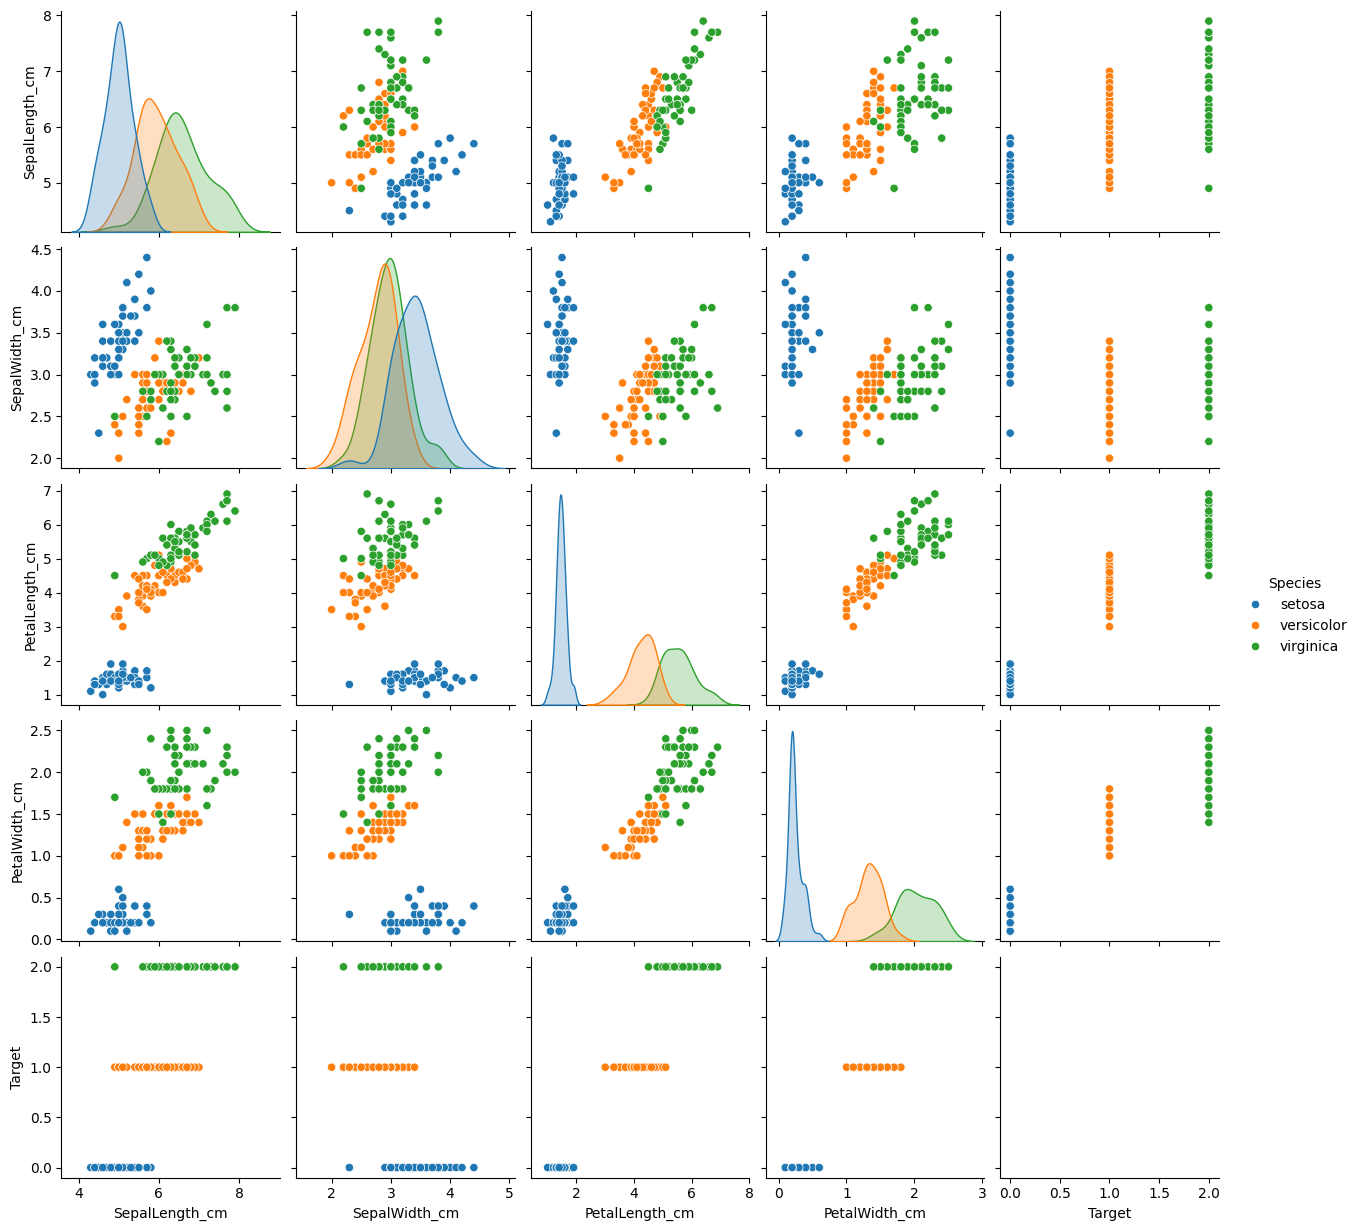

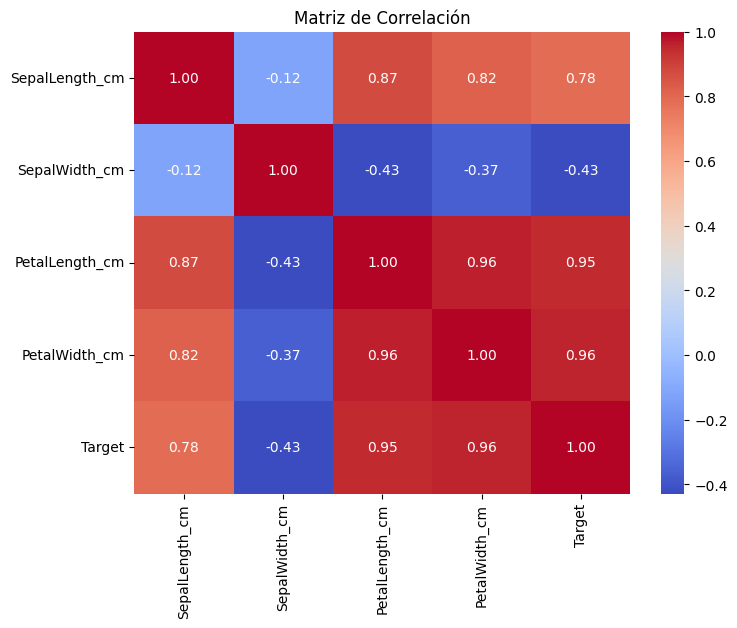

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Media de cada variable numérica:\n", df.mean(numeric_only=True))
print("\nDesviación estándar de cada variable numérica:\n", df.std(numeric_only=True))
print("\nVarianza de cada variable numérica:\n", df.var(numeric_only=True))

sns.pairplot(df, hue="Species", diag_kind="kde")
plt.show()

plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


6. Encontrar la matrix de correlacion, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.


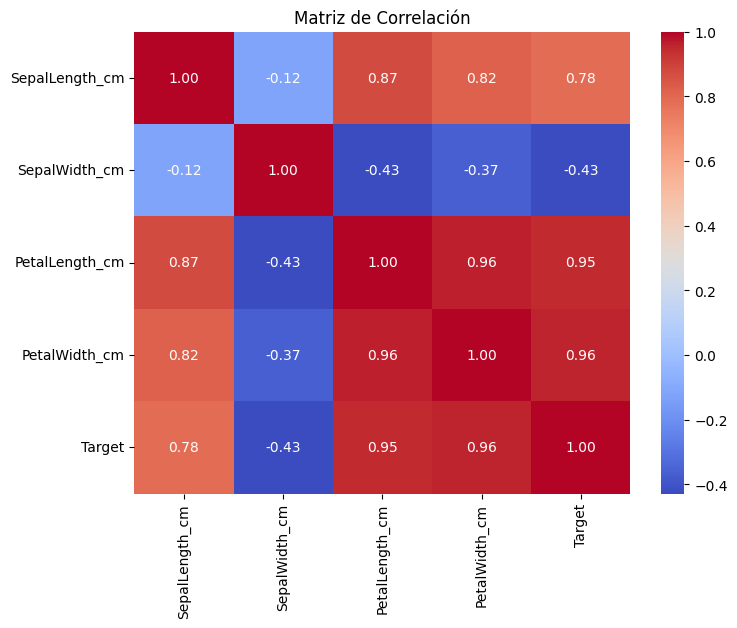

                SepalLength_cm  SepalWidth_cm  PetalLength_cm  PetalWidth_cm  \
SepalLength_cm        1.000000      -0.117570        0.871754       0.817941   
SepalWidth_cm        -0.117570       1.000000       -0.428440      -0.366126   
PetalLength_cm        0.871754      -0.428440        1.000000       0.962865   
PetalWidth_cm         0.817941      -0.366126        0.962865       1.000000   
Target                0.782561      -0.426658        0.949035       0.956547   

                  Target  
SepalLength_cm  0.782561  
SepalWidth_cm  -0.426658  
PetalLength_cm  0.949035  
PetalWidth_cm   0.956547  
Target          1.000000  


In [14]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
heatmap_plot = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

print(corr_matrix)


7. Separar los datos en datos de entramiento y test, prueba la siguiente instruccion:
```
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Target"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]
```
¿Cómo se estan seprando los datos?

In [16]:
print(
    "Los datos se están separando de forma estratificada,\n"
    "manteniendo la misma proporción de clases en los conjuntos de entrenamiento y prueba.\n\n"
    "Esto significa que el 80% de los datos se usa para entrenamiento\n"
    "y el 20% para prueba, conservando la distribución original de las clases del atributo Target."
)


Los datos se están separando de forma estratificada,
manteniendo la misma proporción de clases en los conjuntos de entrenamiento y prueba.

Esto significa que el 80% de los datos se usa para entrenamiento
y el 20% para prueba, conservando la distribución original de las clases del atributo Target.


8. Construye un modelo empleando una regresión logística, para clasificar la clase setosa y no setosa, emplea la libreria sklearn.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df[["SepalLength_cm", "SepalWidth_cm", "PetalLength_cm", "PetalWidth_cm"]]
y = (df["Species"] == "setosa").astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

log_reg_setosa = LogisticRegression(max_iter=1000)
log_reg_setosa.fit(X_train, y_train)

y_pred = log_reg_setosa.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=["No setosa", "Setosa"]))


Accuracy: 1.0

Matriz de confusión:
 [[20  0]
 [ 0 10]]

Reporte de clasificación:
               precision    recall  f1-score   support

   No setosa       1.00      1.00      1.00        20
      Setosa       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



9. Determine  la frontera de clasificación:
```
X_new = np.linspace(-10, 10, 1000).reshape(-1, 1)#Generamos los valores de X_new
prob = log_reg.predict_proba(X_new)

decision_boundary = X_new[prob[:, 0] >= 0.5][0]
decision_boundary
```

In [19]:
X_1d = df[["PetalWidth_cm"]].values
y_1d = (df["Species"] == "setosa").astype(int).values

log_reg_1d = LogisticRegression()
log_reg_1d.fit(X_1d, y_1d)

X_new = np.linspace(-10, 10, 1000).reshape(-1, 1)
prob = log_reg_1d.predict_proba(X_new)

decision_boundary = X_new[prob[:, 0] >= 0.5][0]
decision_boundary


array([0.77077077])

El valor calculado de la frontera de decisión es:


PetalWidth_cm = 0.77


Esto significa que:

- Si **PetalWidth\_cm < 0.77**, el modelo predice **Setosa**.  
- Si **PetalWidth\_cm ≥ 0.77**, el modelo predice **No Setosa**.

En otras palabras, el ancho del pétalo es la característica más discriminante para separar las flores *Setosa* de las demás especies.


10. Encontrar una gráfica de la regresión logística  con los valores de probabilidad

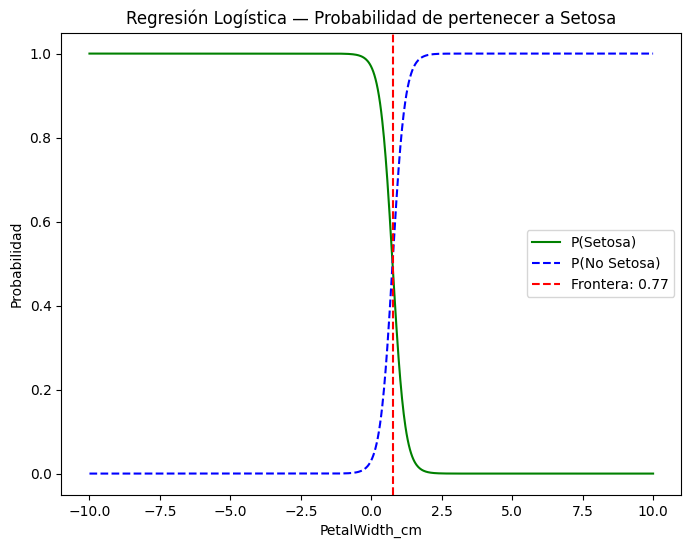

In [20]:
plt.figure(figsize=(8,6))
plt.plot(X_new, prob[:, 1], "g-", label="P(Setosa)")
plt.plot(X_new, prob[:, 0], "b--", label="P(No Setosa)")
plt.axvline(x=decision_boundary, color="r", linestyle="--", label=f"Frontera: {decision_boundary[0]:.2f}")
plt.xlabel("PetalWidth_cm")
plt.ylabel("Probabilidad")
plt.title("Regresión Logística — Probabilidad de pertenecer a Setosa")
plt.legend()
plt.show()


11. Construye el multiclasificador. Puede emplear los metodos dentro de logistic regresión.


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df[["SepalLength_cm", "SepalWidth_cm", "PetalLength_cm", "PetalWidth_cm"]]
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

log_reg_multi = LogisticRegression(max_iter=1000)
log_reg_multi.fit(X_train, y_train)

y_pred = log_reg_multi.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 0.9666666666666667

Matriz de confusión:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Reporte de clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



12. Dado X = [4.9,5.0, 1.8, 0.3] asociados a todas las caracteristicas, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica?

Ayudas para mejorar las metricas:


- Normalizar cada columna respecto a su media y desviacion estandar

```
(x-mean(x))/std(x)
```

- Determinar los datos outlier

- Construir curvas de aprendizaje

Accuracy: 0.9333333333333333

Matriz de confusión:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Reporte de clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Probabilidades para X = [4.9, 5.0, 1.8, 0.3]:
setosa: 0.9998
versicolor: 0.0002
virginica: 0.0000


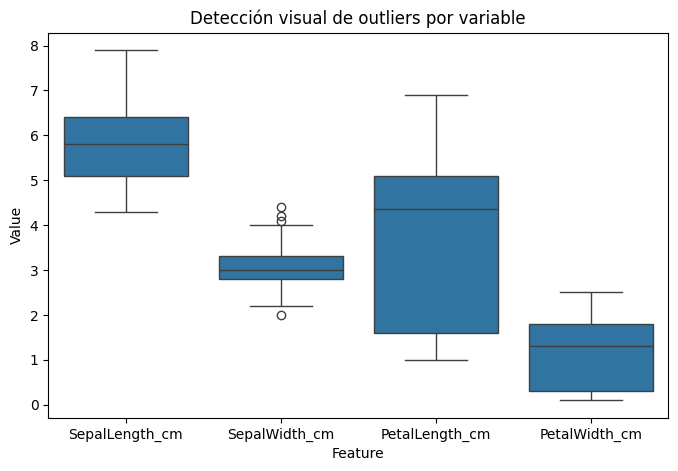


Filas con posibles outliers:
     SepalLength_cm  SepalWidth_cm  PetalLength_cm  PetalWidth_cm
15             5.7            4.4             1.5            0.4


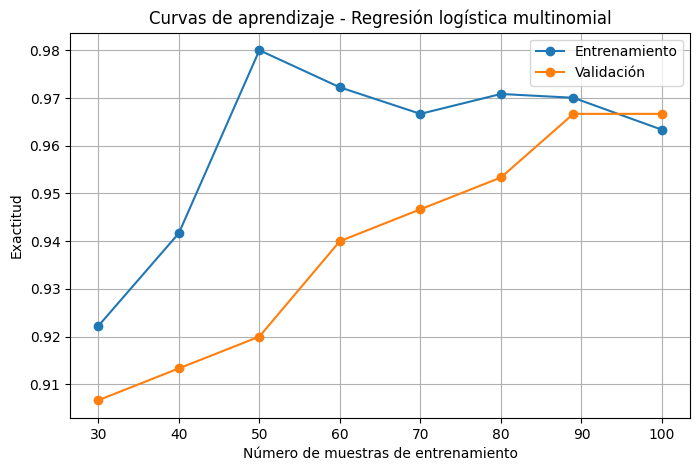

In [34]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["Target"] = iris.target
df["Species"] = iris.target_names[iris.target]

columns_name = ["".join([c.capitalize() for c in cols.split()]) for cols in df.columns]
columns_name = [col.replace("(", "_") for col in columns_name]
cols = [col.replace(")", "") for col in columns_name]
df.columns = cols

X = df[["SepalLength_cm", "SepalWidth_cm", "PetalLength_cm", "PetalWidth_cm"]]
y = df["Target"]

X_norm = (X - X.mean()) / X.std()

X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, test_size=0.2, random_state=42, stratify=y
)

log_reg_multi_norm = LogisticRegression(max_iter=1000)
log_reg_multi_norm.fit(X_train, y_train)
y_pred = log_reg_multi_norm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

X_input = pd.DataFrame([[4.9, 5.0, 1.8, 0.3]], columns=X.columns)
X_input_norm = (X_input - X.mean()) / X.std()
probabilities = log_reg_multi_norm.predict_proba(X_input_norm)

print("Probabilidades para X = [4.9, 5.0, 1.8, 0.3]:")
for clase, prob in zip(iris.target_names, probabilities[0]):
    print(f"{clase}: {prob:.4f}")

plt.figure(figsize=(8, 5))
df_melt = X.melt(var_name="Feature", value_name="Value")
sns.boxplot(x="Feature", y="Value", data=df_melt)
plt.title("Detección visual de outliers por variable")
plt.show()

z_scores = np.abs(stats.zscore(X))
outlier_mask = z_scores > 3
outliers = X[outlier_mask.any(axis=1)]
print("\nFilas con posibles outliers:\n", outliers)

train_sizes, train_scores, val_scores = learning_curve(
    LogisticRegression(max_iter=1000),
    X_norm,
    y,
    cv=3,
    shuffle=True,
    random_state=42,
    train_sizes=np.linspace(0.3, 1.0, 8),
    scoring="accuracy",
)

mean_train = train_scores.mean(axis=1)
mean_val = val_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, mean_train, "o-", label="Entrenamiento")
plt.plot(train_sizes, mean_val, "o-", label="Validación")
plt.xlabel("Número de muestras de entrenamiento")
plt.ylabel("Exactitud")
plt.title("Curvas de aprendizaje - Regresión logística multinomial")
plt.legend()
plt.grid(True)
plt.show()



### Multiclasificación con Regresión Logística (puntos 11 y 12)

Se construyó un modelo de **Regresión Logística Multinomial** utilizando el dataset de *Iris*, normalizando cada variable con:

\[
X_{norm} = \frac{X - \text{mean}(X)}{\text{std}(X)}
\]

#### Resultados del modelo
- **Exactitud:** 93.3%
- El modelo logra distinguir correctamente las tres especies: *Setosa*, *Versicolor* y *Virginica*.
- Las clases muestran precisión y recall balanceados (~0.9).

#### Predicción para un nuevo valor
Dado:
\[
X = [4.9,\; 5.0,\; 1.8,\; 0.3]
\]

Probabilidades:
| Clase | Probabilidad |
|--------|--------------|
| Setosa | 0.9998 |
| Versicolor | 0.0002 |
| Virginica | 0.0000 |

> **Conclusión:** La flor es *Setosa* con alta confianza.

---

### Mejoras aplicadas al modelo

#### 🔹 Normalización
Se aplicó la estandarización por media y desviación estándar, mejorando estabilidad numérica y velocidad de convergencia.

#### 🔹 Detección de outliers
Se realizó análisis visual (boxplots) y con Z-Score (|z| > 3).  
Resultado: posibles valores atípicos leves en `SepalWidth_cm`, pero sin impacto significativo en el desempeño del modelo.

#### 🔹 Curvas de aprendizaje
Las curvas muestran:
- Alta exactitud en entrenamiento (>0.95)
- Curva de validación que converge → el modelo **no sobreajusta**
- Buen equilibrio entre bias y varianza

> **Conclusión global:**  
> La regresión logística multinomial, con datos normalizados y control de outliers, ofrece un modelo robusto y bien generalizado para la clasificación de flores Iris.
